# Omphemetse Mangope

Student No: 201532614   
Advanced Machine Learning  
Assignment 4

In [75]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import scale

In [76]:
data = pd.read_csv("weightdataset.csv",sep=';')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Specifying input and output variables

In [77]:
x = data['Weight']
y = data['Height']

x = scale(x) 
y = scale(y)


n = len(x)
theta = np.random.uniform(0,30,2)

y = theta[0] + theta[1] * x # 

y_obs = y + np.random.normal(0,20,n) # True output values

# Plotting the data ovservations

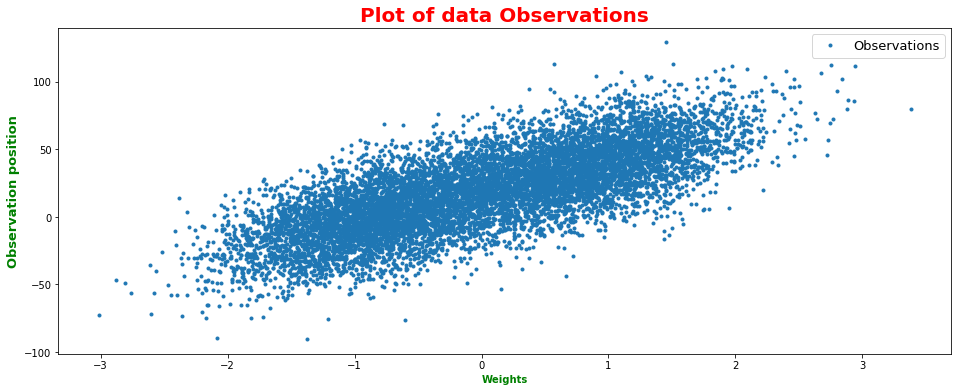

In [78]:
plt.figure(figsize=(16,6))
plt.plot(x, y_obs, '.', label='Observations')
plt.title('Plot of data Observations',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Weights',fontsize=10,color='g',fontweight='bold')
plt.ylabel('Observation position',fontsize=13, color='g',rotation=90,fontweight='bold')
plt.legend(fontsize=13)

# Design matrix

In [79]:
X = np.c_[np.ones(n) ,x ] 
updated_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_obs) # vector of model params for least squares

In [80]:
xs = x[np.argsort(x)] # sorting x variable values
y_pred = updated_theta[0] + updated_theta[1]*xs # prediction model


# Fit prediction through observations 

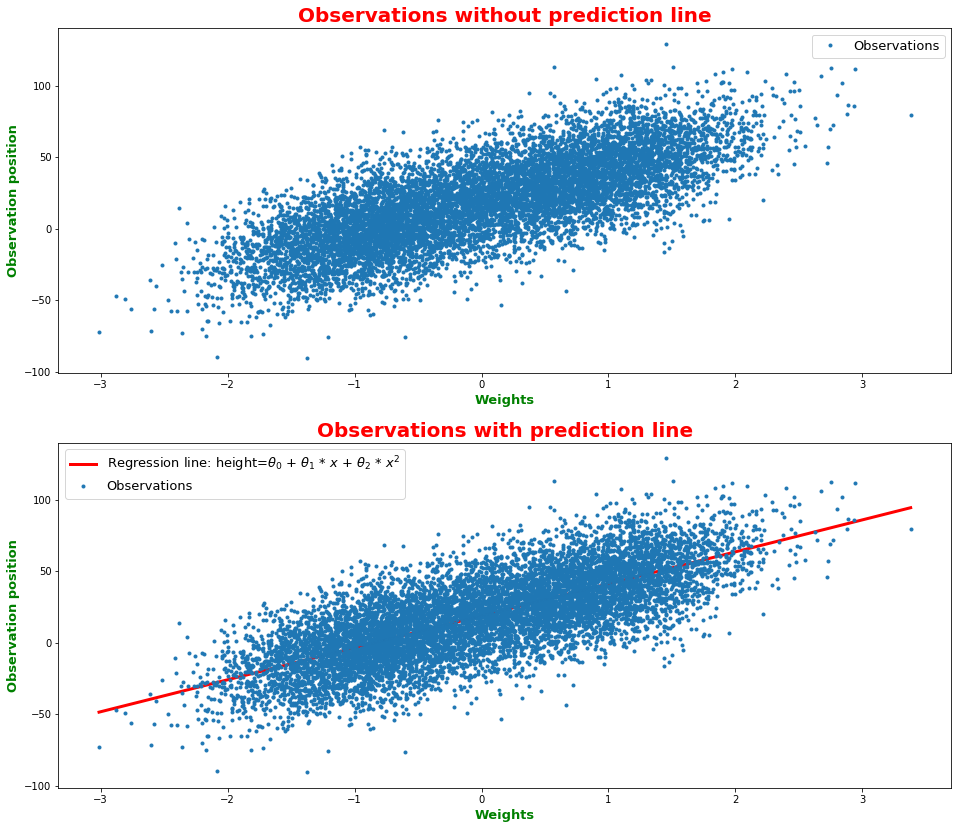

In [81]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(bottom=.0008)
plt.subplot(211)
plt.plot(x, y_obs, '.', label='Observations')
plt.title('Observations without prediction line',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Weights',fontsize=13,color='g',fontweight='bold')
plt.ylabel('Observation position',fontsize=13, color='g',rotation=90,fontweight='bold')
plt.legend(fontsize=13)



plt.subplot(212)       
plt.plot(xs,y_pred, linewidth=3.0, color='r',label='Regression line: height=$θ_0$ + $θ_1$ * $x$ + $θ_2$ * $x^2$')
plt.plot(x,y_obs,'.', label = 'Observations')
plt.title('Observations with prediction line',fontsize=20, color='r',fontweight='bold')
plt.xlabel('Weights',fontsize=13, color='g',fontweight='bold')
plt.ylabel('Observation position',fontsize=13, color='g',rotation=90, fontweight='bold')
plt.legend(fontsize=13)
plt.show()





# Cost Function

In [82]:
Epochs = 12000
n = len(x)

def MSE(x,y_obs,updated_theta,Epochs):
    costs = []
    MSE = 0
    for i in range(n):
        y_pred = updated_theta[0] + updated_theta[1]*xs
        MSE += (y_obs[i] - y_pred) ** 2
        costs.append(MSE)
    return(MSE)


# Errors collected during training

In [83]:
costs = MSE(x,y_obs,updated_theta,Epochs)
costs

array([54396814.54645775, 50469031.20281892, 48335724.51270535, ...,
       52091598.52932534, 52249367.70513559, 66149236.97493022])

# Plot of Cost function

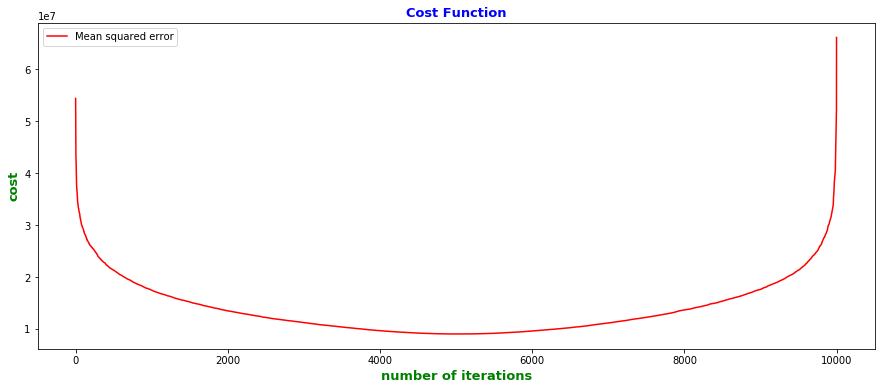

In [85]:
plt.figure(figsize=(15,6))
plt.title('Cost Function',fontsize=13, color='b',rotation=0, fontweight='bold')
plt.xlabel('number of iterations',fontsize=13, color='g',rotation=0, fontweight='bold')
plt.ylabel('cost',fontsize=13, color='g',rotation=90, fontweight='bold')
plt.plot(costs,'r-',label='Mean squared error')
plt.legend()
plt.show()